# Identifying the Pleiades young open cluster using proper motion data

Based on this tutorial: https://starry-project.eu/tutorial/ 

Based on GAIA DR3 data

Information on data access: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html  

Information on open clusters and the HR diagram: https://github.com/helgadenes/Astrophysics_yachay/blob/main/Slides/Astro_3.2.pdf

In [96]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

In [4]:
# Define the source of the data

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Reselect Data Release 3, default
Gaia.ROW_LIMIT = -1  # this will get us an unlimited number of raws of data

In [46]:
c = SkyCoord.from_name('Pleiades')

print(c.ra.deg, c.dec.deg)

56.601 24.114


In [47]:
# Searching for the data
# box search around specific coordinates
# This may take a bit of time - there are millions of objects in the GAIA data base

coord = SkyCoord(ra=c.ra.deg, dec=24.114, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

r.pprint(max_lines=12, max_width=130)  # inspecting a section of the results

INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id            DESIGNATION         ... ebpminrp_gspphot_upper libname_gspphot
                                                                     ...          mag                          
--------------------- ------------------- -------------------------- ... ---------------------- ---------------
 0.006337645533624978 1636148068921376768 Gaia DR3 65225091345088128 ...                     --                
0.0064401193703373955 1636148068921376768 Gaia DR3 65225130001307776 ...                     --                
 0.009046829012055814 1636148068921376768 Gaia DR3 65225095641479808 ...                 0.2611         PHOENIX
                  ...                 ...                        ... ...                    ...             ...
   1.3455135659768802 1636148068921376768 Gaia DR3 65049689175417472 ...                     --                
   1.3465238710266272 1636148068921376768 Gaia DR3 641

In [48]:
# keys in teh data set

r.keys()


['dist',
 'solution_id',
 'DESIGNATION',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_si

## Test plots

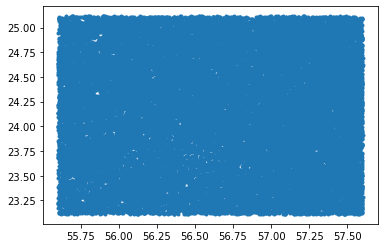

In [49]:
# test plots

plt.plot(r['ra'], r['dec'], linestyle='', marker='.' )

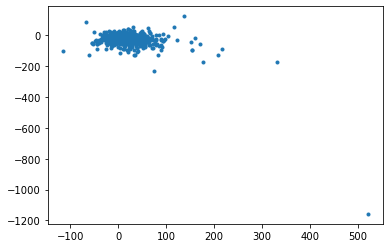

In [50]:
# test plots

plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )

## Analysing the proper motion data

Star clusters were born together -> when they are young they should move the same way. -> Their proper motion should be the same.

**What do you notice from the plot?**

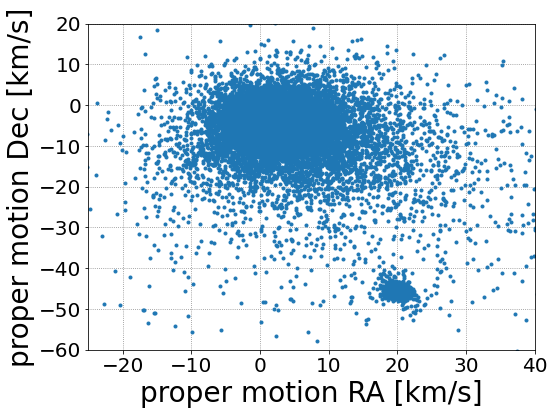

In [65]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )
plt.xlabel("proper motion RA [km/s]", fontsize=28)
plt.ylabel('proper motion Dec [km/s]', fontsize=28)

plt.xlim(-25,40)
plt.ylim(-60,20)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## The HR diagram for the full fata set

**What do you notice?**

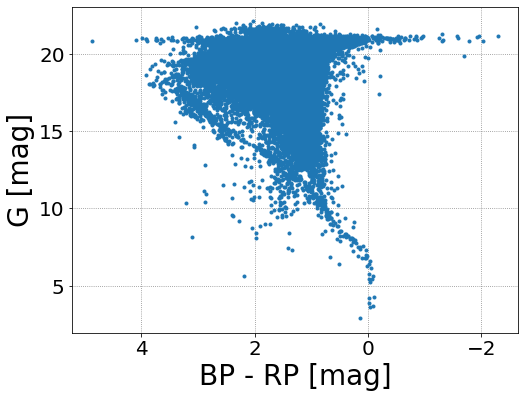

In [52]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['bp_rp'], r['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.invert_xaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Selecting the Pleiades star cluster based on the proper motion of the stars

In [78]:
# creating a data frame with a sub set of the data

mask = (r['pmra'] < 25) & (r['pmra'] > 15) & (r['pmdec'] < -40) & (r['pmdec'] > -50)  # Makes a boolean selection mask (numpy array)
r_P = r[mask]  # Makes a new astropy Table

In [79]:
# Number of rows in the new sub array

len(r_P)

594

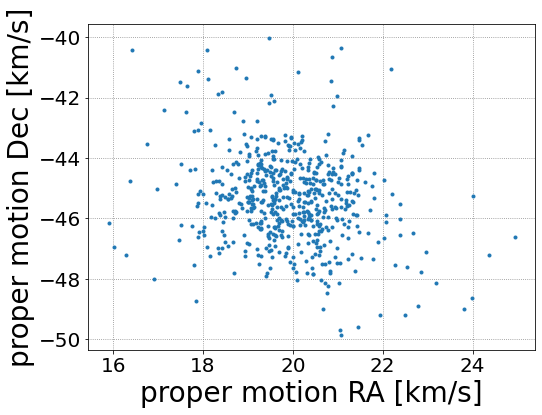

In [80]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['pmra'], r_P['pmdec'], linestyle='', marker='.' )
plt.xlabel("proper motion RA [km/s]", fontsize=28)
plt.ylabel('proper motion Dec [km/s]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

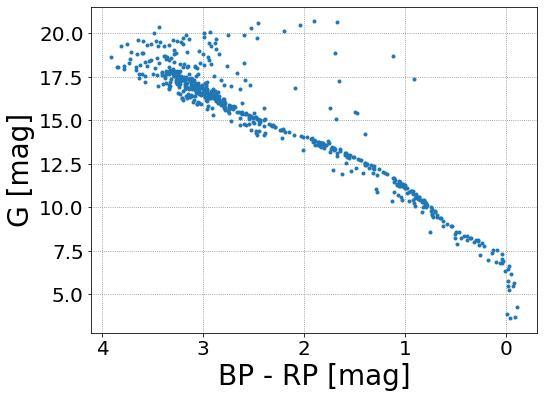

In [81]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['bp_rp'], r_P['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.invert_xaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

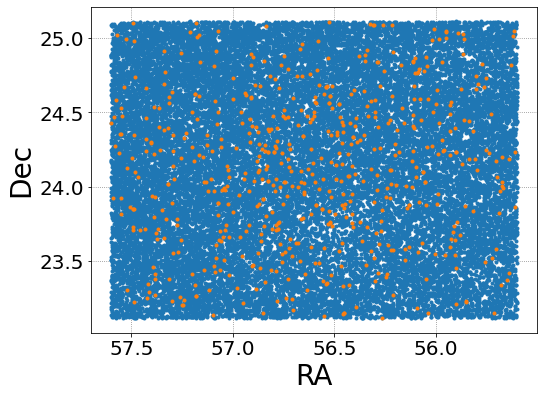

In [57]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['ra'], r['dec'], linestyle='', marker='.' )
plt.plot(r_P['ra'], r_P['dec'], linestyle='', marker='.' )
plt.xlabel("RA", fontsize=28)
plt.ylabel('Dec', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.invert_xaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Add another cluster

In [68]:
c_2 = SkyCoord.from_name('NGC 752')

print(c_2.ra.deg, c_2.dec.deg)

29.223 37.794


In [69]:
# Searching for the data
# box search around specific coordinates

coord = SkyCoord(ra=c_2.ra.deg, dec=c_2.dec.deg, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)
r_2 = Gaia.query_object_async(coordinate=coord, width=width, height=height)


INFO: Query finished. [astroquery.utils.tap.core]


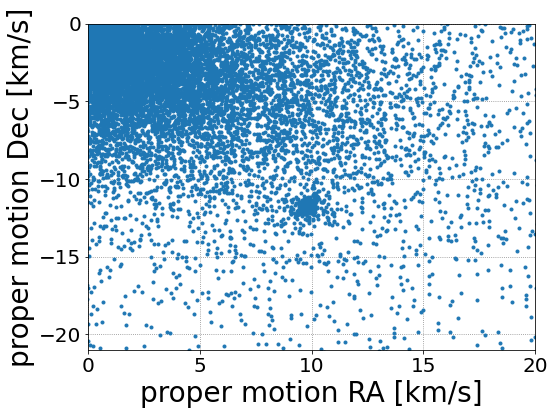

In [95]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_2['pmra'], r_2['pmdec'], linestyle='', marker='.' )
plt.xlabel("proper motion RA [km/s]", fontsize=28)
plt.ylabel('proper motion Dec [km/s]', fontsize=28)

plt.xlim(0,20)
plt.ylim(-21,0)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [74]:
# creating a data frame with a sub set of the data

mask = (r_2['pmra'] < 12) & (r_2['pmra'] > 8) & (r_2['pmdec'] < -10) & (r_2['pmdec'] > -13)  # Makes a boolean selection mask (numpy array)
r_C2 = r_2[mask]  # Makes a new astropy Table

In [75]:
# Number of rows in the new sub array

len(r_C2)

400

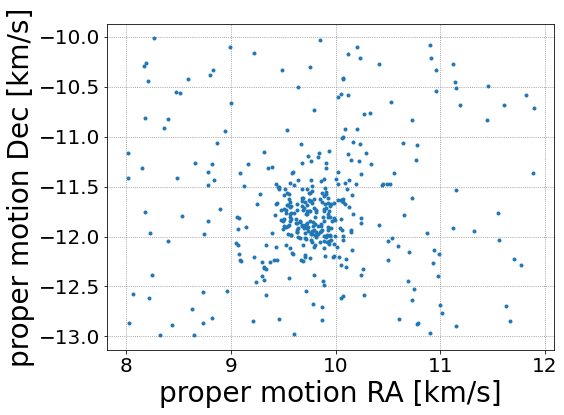

In [76]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_C2['pmra'], r_C2['pmdec'], linestyle='', marker='.' )
plt.xlabel("proper motion RA [km/s]", fontsize=28)
plt.ylabel('proper motion Dec [km/s]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

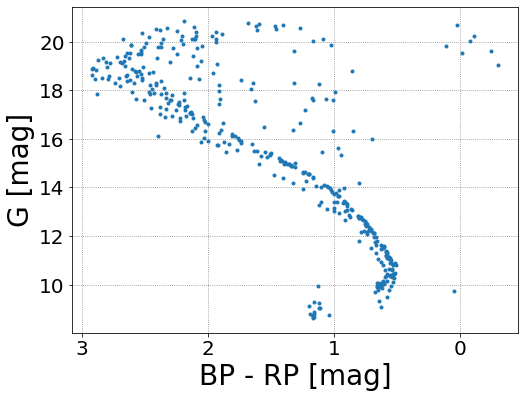

In [77]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_C2['bp_rp'], r_C2['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.invert_xaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Comparing the two star clusters

**Which cluster is younger?**

**What is the reason of the offsets?**

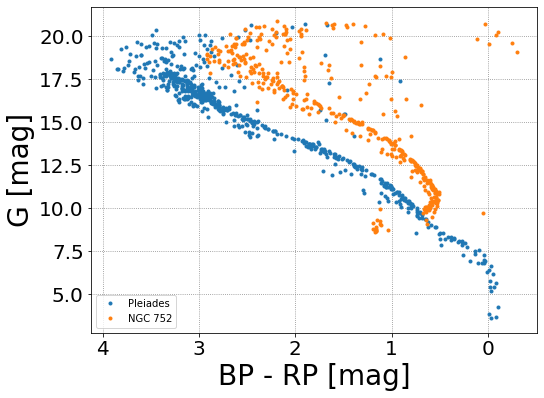

In [88]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['bp_rp'], r_P['phot_g_mean_mag'], linestyle='', marker='.' , label='Pleiades')
plt.plot(r_C2['bp_rp'], r_C2['phot_g_mean_mag'], linestyle='', marker='.' , label='NGC 752')
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.invert_xaxis()
plt.legend()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [87]:
c_2 = SkyCoord.from_name('NGC 2362')

print(c_2.ra.deg, c_2.dec.deg)

109.671 -24.954


## Making a function to get data for various star clusters

**How do we know the proper motion of the cluster?**

We can check this in teh CDS data base: https://cds.unistra.fr//
1. Search the name of the object in the CDS tab
2. Scroll to the Tabular Data section
3. You are looking for the PMRA, PMDEC values (proper motion RA, proper motion Dec)


In [97]:
def get_cluster_data(name, box, proper_motion_lim):
    c = SkyCoord.from_name(name)

    coord = SkyCoord(ra=c.ra.deg, dec=c.dec.deg, unit=(u.degree, u.degree), frame='icrs')
    width = u.Quantity(box[0], u.deg)
    height = u.Quantity(box[1], u.deg)
    r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
    
    # creating a data frame with a sub set of the data

    mask = (r['pmra'] < proper_motion_lim[1]) & (r['pmra'] > proper_motion_lim[0]) & (r['pmdec'] < proper_motion_lim[3]) & (r['pmdec'] > proper_motion_lim[2])  # Makes a boolean selection mask (numpy array)
    r_P = r[mask]  # Makes a new astropy Table

    return r_P

In [98]:
ngc_752 = get_cluster_data('NGC 752', [2.0, 2.0], [8, 12, -13, -10])

INFO: Query finished. [astroquery.utils.tap.core]


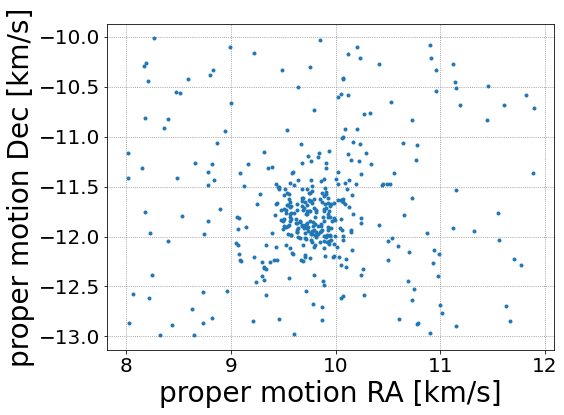

In [99]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(ngc_752['pmra'], ngc_752['pmdec'], linestyle='', marker='.' )
plt.xlabel("proper motion RA [km/s]", fontsize=28)
plt.ylabel('proper motion Dec [km/s]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

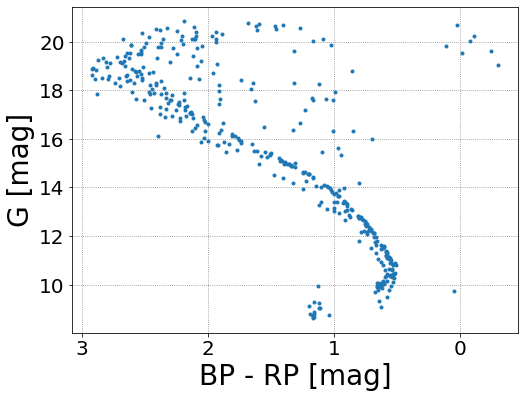

In [100]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(ngc_752['bp_rp'], ngc_752['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.invert_xaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Compare 3 clusters

In [106]:
ngc_2362 = get_cluster_data('NGC 2362', [0.5, 0.5], [-3.25, -2.5, 2.5, 3.5])

INFO: Query finished. [astroquery.utils.tap.core]


In [107]:
len(ngc_2362)

703

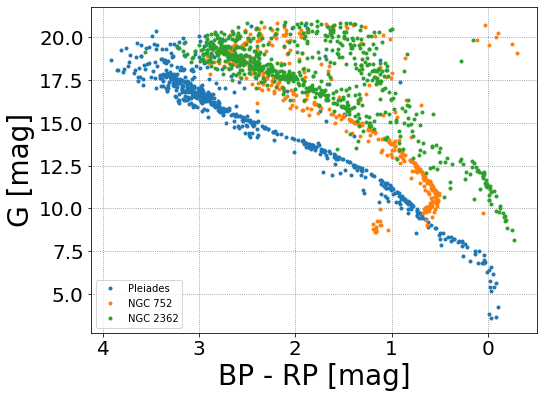

In [108]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['bp_rp'], r_P['phot_g_mean_mag'], linestyle='', marker='.' , label='Pleiades')
plt.plot(ngc_752['bp_rp'], ngc_752['phot_g_mean_mag'], linestyle='', marker='.' , label='NGC 752')
plt.plot(ngc_2362['bp_rp'], ngc_2362['phot_g_mean_mag'], linestyle='', marker='.' , label='NGC 2362')
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)  
ax.invert_xaxis()
plt.legend()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## How can we scale the curves to each other?

## What are important things to consider for colour - magnitude diagrams?